In [ ]:
import pandas as pd
import os
from collections import defaultdict
from numpy import nan

all_files = [f for f in os.listdir('../alldrugbank')]

results_dir = '../alldrugbank'
files_to_analyze = []
file_ext = '_merged_neighborhood_.txt'
for (dir_name,sub_dir,file_list) in os.walk(results_dir):
    for file_name in file_list:
        if file_ext in file_name:
            files_to_analyze.append(file_name)

# Obtains all DrugBank ID's so we are able to get the path to the tables
drugbank_ids = []
for f in range(0, len(files_to_analyze)-1):
    identification = files_to_analyze[f].split('_')[0]
    drugbank_ids.append(identification)

path = '../alldrugbank'

drugs_to_genes = defaultdict(set)

# Create default dictionary with drugBankID to list of network genes!
for f in range(0, len(files_to_analyze)-1):
    network_genes = []
    if os.stat(os.path.join(path, drugbank_ids[f], files_to_analyze[f])).st_size == 0:
        continue
    rfile = pd.read_csv(os.path.join(path, drugbank_ids[f], files_to_analyze[f]),sep='\t', header=None)
    for i in rfile[0]:
        if pd.isnull(i):
            continue
        network_genes.append(i)
    for j in rfile[1]:
        if pd.isnull(j):
            continue
        network_genes.append(j)
    for x in network_genes:
        if pd.isnull(x):
            network_genes.remove(x)
    network_genes = set(network_genes)
    drugs_to_genes[drugbank_ids[f]] = network_genes

import pandas as pd
# Read in csv that has drugbank ID and its common names and synonyms
rfile = '../drugbank_vocabulary.csv'
drugvocab = pd.read_csv(rfile,sep=',')

df = pd.read_excel('../sweetlead_ranked.xlsx')
df = df.fillna(method='ffill')

# Mines each of the drug names and puts all their names into a list of cleaned up names
cleaned_up_names = []
for i in range(0,len(df["OfficialNames"])):
    all_countries = df["OfficialNames"][i].split(',')
    for country in all_countries:
        if ';' in country:
            equal_sign = country.find("=")
            drugnames = country[equal_sign+1:]
            x = drugnames.split(';')
            for i in x:
                cleaned_up_names.append(i)
        else:
            equal_sign = country.find("=")
            drugnames = country[equal_sign+1:]
            cleaned_up_names.append(drugnames)

for i in range(0,len(cleaned_up_names)-1):
    cleaned_up_names[i] = cleaned_up_names[i].title()

unique_names = set(cleaned_up_names)

unique_names_list = list(unique_names)
unique_names_list.sort()

drugs_to_values = defaultdict(int)
drugbank_ids_list = []

for i in range(0,len(unique_names_list)-1):
    for j in drugvocab["Common name"]:
        if unique_names_list[i] == j:
            x = drugvocab.loc[drugvocab["Common name"] == unique_names_list[i], "DrugBank ID"].values
            x = ''.join(x)
            drugbank_ids_list.append(x)

for f in range(0, len(drugbank_ids_list)-1):
    drugs_to_values[drugbank_ids_list[f]] = 1

df2 = pd.read_excel('../sweetlead_ranked2.xlsx')

df2 = df2.fillna(method='ffill')

cleaned_up_names2 = []
for i in range(0,len(df2["OfficialNames"])):
    all_countries = df2["OfficialNames"][i].split(',')
    for country in all_countries:
        if ';' in country:
            equal_sign = country.find("=")
            drugnames = country[equal_sign+1:]
            x = drugnames.split(';')
            for i in x:
                cleaned_up_names2.append(i)
        else:
            equal_sign = country.find("=")
            drugnames = country[equal_sign+1:]
            cleaned_up_names2.append(drugnames)

for i in range(0,len(cleaned_up_names2)-1):
    cleaned_up_names2[i] = cleaned_up_names2[i].title()

unique_names2 = set(cleaned_up_names2)

unique_names_list2 = list(unique_names2)
unique_names_list2.sort()

drugs_to_values2 = defaultdict(int)
drugbank_ids_list2 = []

for i in range(0,len(unique_names_list2)-1):
    for j in drugvocab["Common name"]:
        if unique_names_list2[i] == j:
            x = drugvocab.loc[drugvocab["Common name"] == unique_names_list2[i], "DrugBank ID"].values
            x = ''.join(x)
            drugbank_ids_list2.append(x)

for f in range(0, len(drugbank_ids_list2)-1):
    drugs_to_values2[drugbank_ids_list2[f]] = 0

drugs_to_values.update(drugs_to_values2)

In [ ]:
all_rows = []
for (dbid, effect_size) in drugs_to_values.items():
    net_genes = drugs_to_genes[dbid]
    row_data = {'name':dbid, 'effect':effect_size}
    for g in net_genes:
        row_data[g]=1
    all_rows.append(row_data)

df = pd.DataFrame(all_rows)
df.fillna(0)

,name,effect,rs2854116,OR8D2,CTSL,rs2229774,TTN,RARA,rs5128,DERL1,...,rs5182,rs12721226,rs5186,rs275651,CACNA1A,LRAT,RBP2,LEF1,rs1741981,HDAC1
0,DB00459,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DB01143,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB01025,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB01125,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DB00335,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,DB00177,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
281,DB00661,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
282,DB00194,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,DB00162,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
data_label_dic = {}
color1 = 'magenta'
color2 = 'dodgerblue'
df_drugs = list(df['name'].to_list())
for drug_bank_id in range(len(df.index)):
    if df['effect'][drug_bank_id] == 0:
        data_label_dic[df['name'][drug_bank_id]] = color1
    elif df['effect'][drug_bank_id] == 1:
        data_label_dic[df['name'][drug_bank_id]] = color2

In [ ]:
# format object for row colors
(dnames,dcolors) = zip(*[(k,v) for (k,v) in data_label_dic.items()])
rc_df = pd.DataFrame.from_dict({'Drugs': dnames,'Colors': dcolors})
rc_df = rc_df.set_index('Drugs')
print(rc_df.head())

             Colors
Drugs              
DB00459  dodgerblue
DB01143  dodgerblue
DB01025  dodgerblue
DB01125  dodgerblue
DB00335  dodgerblue


In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# formatting for better colorbar
myColors = ((0.0, 0.0, 0.0, 0.0), (0.6, 0.6, 0.6, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

In [ ]:
# create numpy array for use with scipy
df = df.set_index('name')
data = df.loc[:, (df.columns != 'name')]
data = data.fillna(0)
print(data.head())

         effect  rs2854116  OR8D2  CTSL  rs2229774  TTN  RARA  rs5128  DERL1  \
name                                                                           
DB00459       1        1.0    1.0   1.0        1.0  1.0   1.0     1.0    1.0   
DB01143       1        0.0    0.0   0.0        0.0  0.0   0.0     0.0    0.0   
DB01025       1        0.0    0.0   0.0        0.0  0.0   0.0     0.0    0.0   
DB01125       1        0.0    0.0   0.0        0.0  0.0   0.0     0.0    0.0   
DB00335       1        1.0    1.0   1.0        0.0  1.0   0.0     1.0    1.0   

         rs2234753  ...  rs5182  rs12721226  rs5186  rs275651  CACNA1A  LRAT  \
name                ...                                                        
DB00459        1.0  ...     0.0         0.0     0.0       0.0      0.0   0.0   
DB01143        0.0  ...     0.0         0.0     0.0       0.0      0.0   0.0   
DB01025        0.0  ...     0.0         0.0     0.0       0.0      0.0   0.0   
DB01125        0.0  ...     0.0        

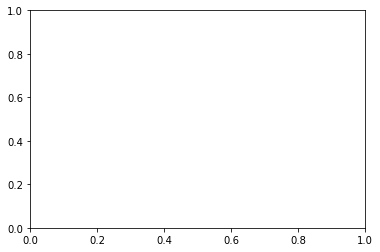

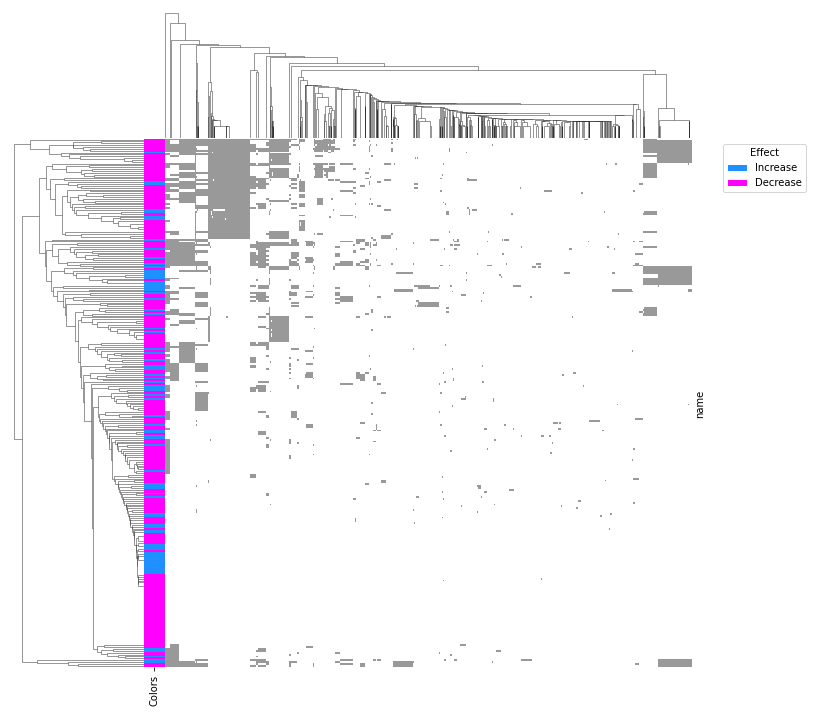

In [ ]:
import pickle,os,csv,sys
import pandas as pd
import matplotlib
#matplotlib.use("AGG")
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

fig,ax = plt.subplots()
g = sns.clustermap(data,cmap=cmap,yticklabels=False,xticklabels=False,row_colors=rc_df)
g.cax.set_visible(False)

# Create legend elements
legend_elements = [
    Patch(facecolor=color2, edgecolor='w', label='Increase'),
    Patch(facecolor=color1, edgecolor='w', label='Decrease')
]

# Add the legend to the heatmap
g.ax_heatmap.legend(
    handles=legend_elements,
    loc='upper left',
    bbox_to_anchor=(1.05, 1),  # Move legend further to the right
    title='Effect'
)

# Save the figure
g.fig.savefig("heatmap_insilico.png", dpi=300, bbox_inches="tight")

In [ ]:
ax.set(xlabel= 'Network Proteins',ylabel='Drugs')
rdir = "../ridge regression"
plt.savefig(os.path.join(rdir,'all_drugs_clustermap_090923.png'),format='png')

<Figure size 432x288 with 0 Axes>